<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Team_13_Prelim_Examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**PRELIM EXAM** |
**Name** | Celeste, Rolando \| Estrañero, Jhonlix
**Section** | CPE31S9
**Date Performed**: | 05/03/2024
**Date Submitted**: | 05/03/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

###Instructions

Choose any dataset applicable for classification and/or prediction analysis problems.
Show the application of the following algorithms:
* Linear Regression
  * Singular LR
  * Multiple LR
  * Polynomial LR
* Logistic Regression
* Decision Tree
* Random Forest

Provide Evaluation reports for all models

## Linear Regresion

### Singular Linear Regression

### Importing libraries and dataset

- For Single Linear Regression, we decided to use the WeatherData.csv dataset which contains only two columns, Temperature(C) and Humidity.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv('/content/WeatherData.csv')
weather_data.head()

,Temperature(C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


- Before we preprocess and train the data, we first visualize the correlation and of the data variables by visualizing the data using matplotplib.pyplot and seaborn heatmaps.

Text(0, 0.5, 'Humidity')

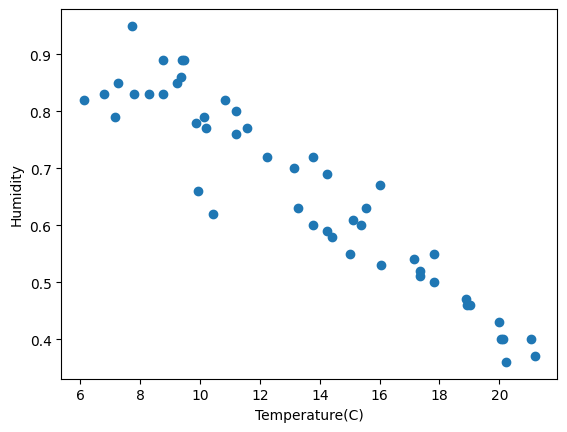

In [ ]:
# Set x to our input Temperature
x = weather_data['Temperature(C)']
# Set y to our output humidity, this is the value we trying to predict
y = weather_data['Humidity']

# Plot Humidity against Temperature
plt.scatter(x, y)
# Add labels to the graph
plt.xlabel('Temperature(C)')
plt.ylabel('Humidity')

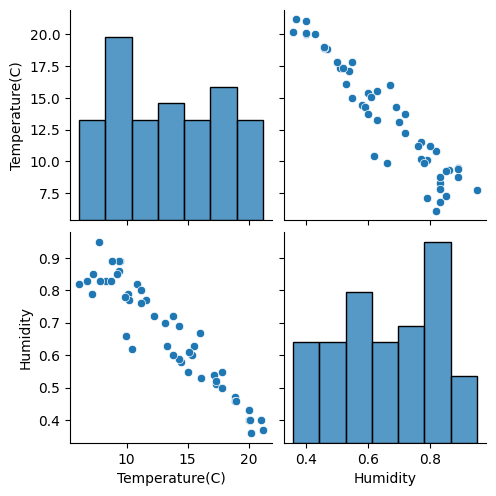

In [ ]:
sns.pairplot(weather_data)

<Axes: >

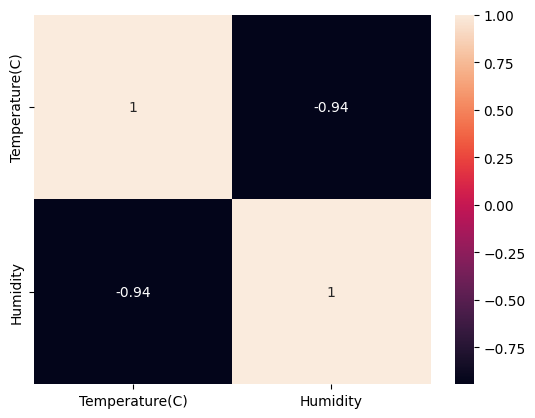

In [ ]:
sns.heatmap(weather_data.corr(), annot = True)

### Selecting x and y

- Our initial Preprocessing of data includes selecting x and y variables and splitting the data to train and test sets.

In [ ]:
x = weather_data['Temperature(C)'].values.reshape(-1,1)
y = weather_data['Humidity'].values

### Splitting to train and test


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x , y, test_size = 0.3, random_state = 42)

In [ ]:
x_train = np.array(x_train).reshape(-1,1)

In [ ]:
x_test = np.array(x_test).reshape(-1,1)

###**Creating Model**

- Here we imported the model which we will use (LinearRegression) and fit the splitted variables.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

###**Predict data**

- we used predict function at 'lin_reg' to predict the trained results from the model

In [ ]:
pred = lin_reg.predict(x_test)
pred

array([0.52465003, 0.38815241, 0.88174985, 0.60658799, 0.5878762 ,
       0.6509054 , 0.74269167, 0.78779695, 0.78917571, 0.67316259,
       0.50810486, 0.82876593, 0.42853049, 0.75549448, 0.84531109])

### **Model Evaluation**

- After predicting we then calculate for the coefficients and the intercept value from the Linear regression model. In addition, we also calculated the Rsquared value to determine how well the model is blend and how well the output value is explained by the determining(independent) variables of the dataset.

In [ ]:
theta_0 = lin_reg.intercept_
theta_1 = lin_reg.coef_
theta_0, theta_1

(1.1391847504711548, array([-0.03545393]))

**Calculate Coefficients**

In [ ]:
print("Coefficient: {}".format(lin_reg.coef_))

Coefficient: [-0.03545393]


**Calculate Intercept**

In [ ]:
print("Intercept: {}".format(lin_reg.intercept_))

Intercept: 1.1391847504711548


In [ ]:
from sklearn.metrics import r2_score
print("R-squared values: {}%".format((r2_score(y_test, pred)*100).round(3)))

R-squared values: 89.802%


Text(0, 0.5, 'Humidity')

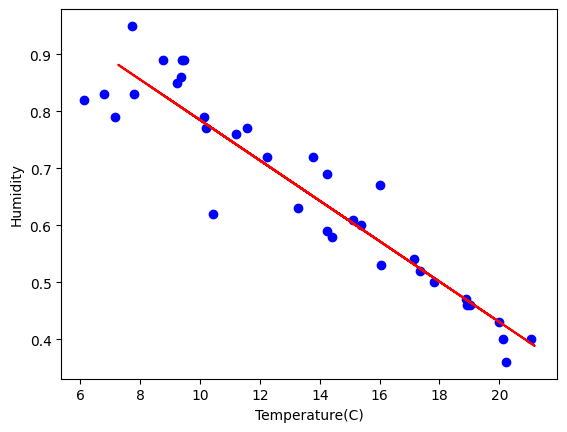

In [ ]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_test, pred, color = 'red')
# Add labels to the graph
plt.xlabel('Temperature(C)')
plt.ylabel('Humidity')

In [ ]:
test_pred = lin_reg.predict(x_test)

Text(0, 0.5, 'Humidity')

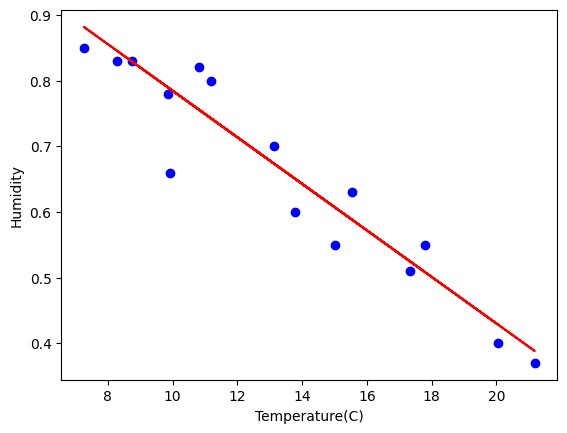

In [ ]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, test_pred, color = 'red')
# Add labels to the graph
plt.xlabel('Temperature(C)')
plt.ylabel('Humidity')

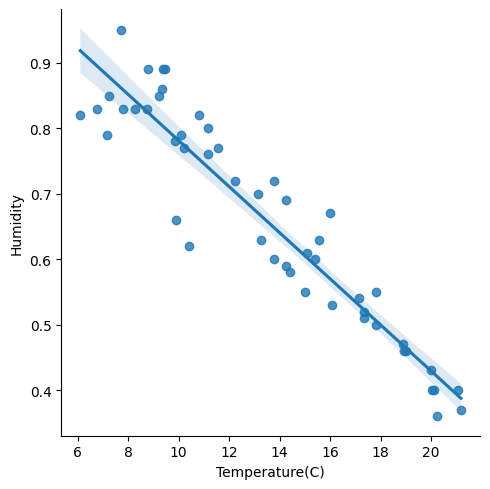

In [ ]:
sns.lmplot(x = 'Temperature(C)', y = 'Humidity', data = weather_data)

### **Evaluation Report:**

- Analyzing this basic dataset for linear regression, we can clearly observe how the x = 'Temperature(C)' and y = 'Humidity' correlate with each other. We intended to predict how temperature will behave depending on the humidity. Observing the graph, as Temperature Rises, Humidity also rises, which is also true in a real world setting. In the overall process, not much have changed after we used Singular LinearRegression on the data. With an R2 value of 88.87% or 89%, we can say that the model is quite accurate and reliable but can still be improved to reach higher accuracy.

## Multiple Linear Regression

### Importing Libraries and Dataset

- For Multiple Linear Regression, we now change the dataset and use Student_Perfomance.csv dataset which has multiple variables to evaluate.

In [ ]:
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import our WeatherDataM and store it in the variable weather_data_m
std_perf = pd.read_csv("/content/Student_Performance.csv")
# Display the data in the notebook
std_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Data Cleaning

- At column "Extracurricular Activities", we modified to contain binary labels (0 or 1) instead of 'No' and 'Yes'.
The correlation of each variable with the target variable ("Performance Index") is also calculated and displayed.

In [ ]:
std_perf.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
std_perf["Extracurricular Activities"] = std_perf["Extracurricular Activities"].apply(lambda toLabel: 0 if toLabel == 'No' else 1)
std_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
std_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
std_perf.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [ ]:
#housing = std_perf.drop(columns = ['Address'])

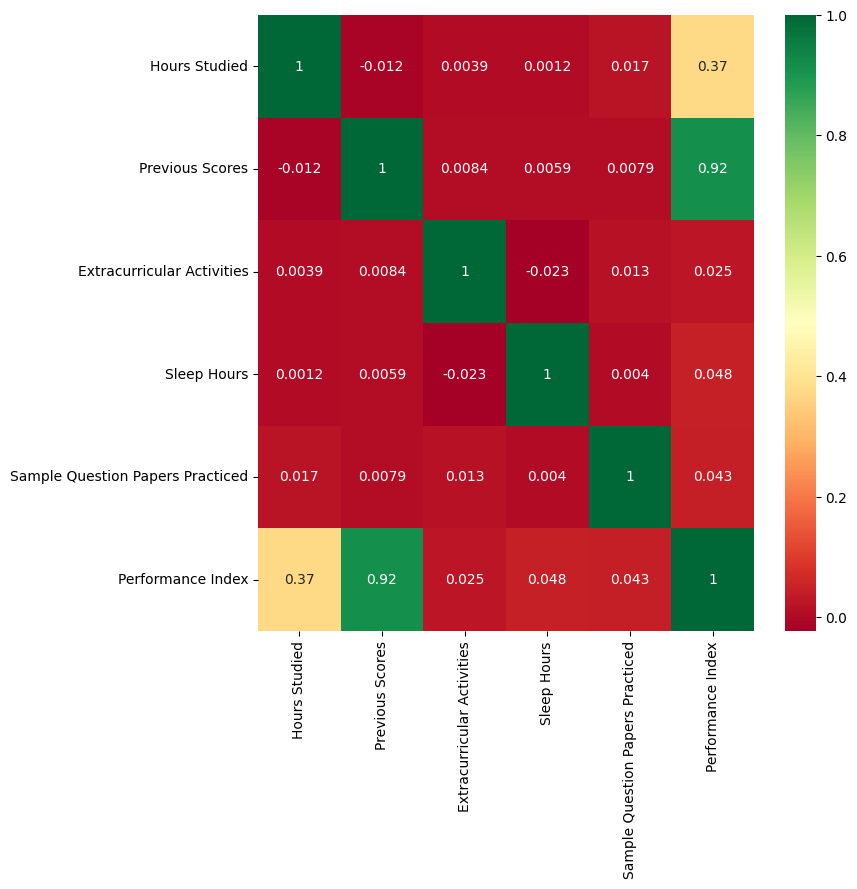

In [ ]:
# Heat map of the data set
plt.figure(figsize = (8, 8))
sns.heatmap(std_perf.corr(), cmap="RdYlGn", annot=True)
plt.show()

### Selecting and Splitting data

- The dataset is split into independent variables (X) and the target variable (y) to train and test.

In [ ]:
X= std_perf.iloc[:, :-1]
X.shape

(10000, 5)

In [ ]:
y= std_perf.iloc[:, -1]
y.shape

(10000,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=50)

### Creating Model

- Here, we also use LinearyRegression model and fit the splitted variables.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_Reg = LinearRegression()
lin_Reg.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

- After predicting the model, we then evaluate the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared score. Additionally, we compare the actual and predicted values and print the coefficients and intercept.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_Pred_train = lin_Reg.predict(X_train)
y_Pred = lin_Reg.predict(X_test)

In [ ]:
MAE_multi = metrics.mean_absolute_error(y_test,y_Pred).round(3)
MSE_multi = metrics.mean_squared_error(y_test,y_Pred).round(3)
RMSE_multi   = np.sqrt(MSE_multi).round(3)

pd.DataFrame([MAE_multi, MSE_multi, RMSE_multi],
             index = ['MAE', 'MSE', 'RMSE_poly'],
             columns = ['Metrics'])

,Metrics
MAE,1.605
MSE,4.039
RMSE_poly,2.010


In [ ]:
data =  pd.DataFrame({'Actual Performance': y_test.round(3), 'Predicted Performance': y_Pred.round(3)})
print(data)

      Actual Performance  Predicted Performance
9102                29.0                 29.850
7868                31.0                 30.636
4176                56.0                 54.471
4161                38.0                 37.492
8770                51.0                 48.155
...                  ...                    ...
6138                22.0                 21.019
6174                46.0                 46.213
3289                88.0                 89.540
5039                59.0                 55.797
3111                61.0                 57.873

[3000 rows x 2 columns]


In [ ]:
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test,y_Pred).round(3))), print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test,y_Pred).round(3)))

Mean Absolute Error: 1.605
Mean Squared Error: 4.039


(None, None)

In [ ]:
print("R2 squared/Accuracy score: {}%".format((r2_score(y_test,y_Pred)*100).round(3)))

R2 squared/Accuracy score: 98.887%


In [ ]:
print('Coefficient is : {}'.format(lin_Reg.coef_) + '\nIntercept is : {}'.format(lin_Reg.intercept_))

Coefficient is : [2.85120029 1.01804979 0.62827329 0.47636268 0.19201174]
Intercept is : -33.99505413491658


In [ ]:
import statsmodels.api as sms
model_1 = sms.OLS(y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.395e+05
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                        0.00
Time:                        05:05:47   Log-Likelihood:                         -22262.
No. Observations:                7000   AIC:                                  4.453e+04
Df Residuals:                    6995   BIC:                                  4.457e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        2.1965      0.025     86.287      0.000       2.147       2.246
Previous Scores                      0.8183      0.003    265.751      0.000       0.812       0.824
Extracurricular Activities          -1.0901      0.138     -7.927      0.000      -1.360      -0.821
Sleep Hours                         -1.5193      0.032    -47.050      0.000      -1.583      -1.456
Sample Question Papers Practiced    -0.2754      0.024    -11.698      0.000      -0.322      -0.229
==============================================================================
Omnibus:                       27.424   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.751
Skew:                           0.003   Prob(JB):                     3.12e-05
Kurtosis:                       2.733   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We create scatter plots and regression plots to visualize the relationship between actual and predicted values.

In [ ]:
import numpy as np
import pandas as pd
# Convert the numpy array to a pandas DataFrame
y_test_sort = pd.DataFrame(y_test, columns=['values'])

# Sort the values in the DataFrame
y_test_sorted = y_test_sort.sort_values(by='values')

In [ ]:
# Convert the numpy array to a pandas DataFrame
y_Pred_sort = pd.DataFrame(y_Pred, columns=['values'])

# Sort the values in the DataFrame
y_Pred_sorted = y_Pred_sort.sort_values(by='values')

In [ ]:
new_y_test = y_test[:60]
new_y_Predt = y_Pred[:60]

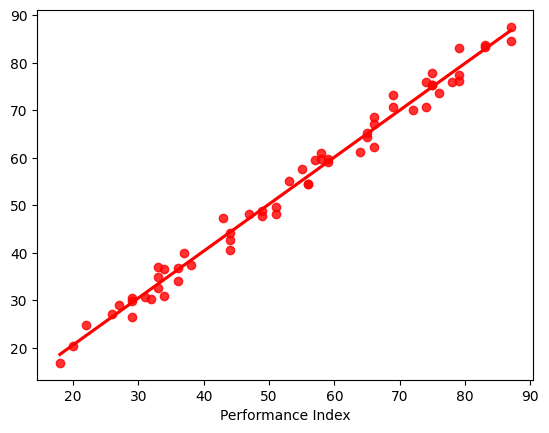

In [ ]:
sns.regplot(x=new_y_test,y=new_y_Predt,ci=None,color ='red');

In [ ]:
sorted(y_test)[:20]

[11.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0]

In [ ]:
sorted(y_Pred)[:20]

[12.687897125739987,
 12.978001111163287,
 13.012349208073822,
 13.077673633788727,
 13.112021730699269,
 13.588384414620428,
 14.024645964613384,
 14.34909804694722,
 14.374321338733921,
 14.414422472662125,
 14.479746898377023,
 14.566333074249457,
 14.69302038405008,
 15.003163343749172,
 15.035362448435265,
 15.20948420189945,
 15.645745751892406,
 16.370888511426926,
 16.571456332559556,
 16.59149530683535]

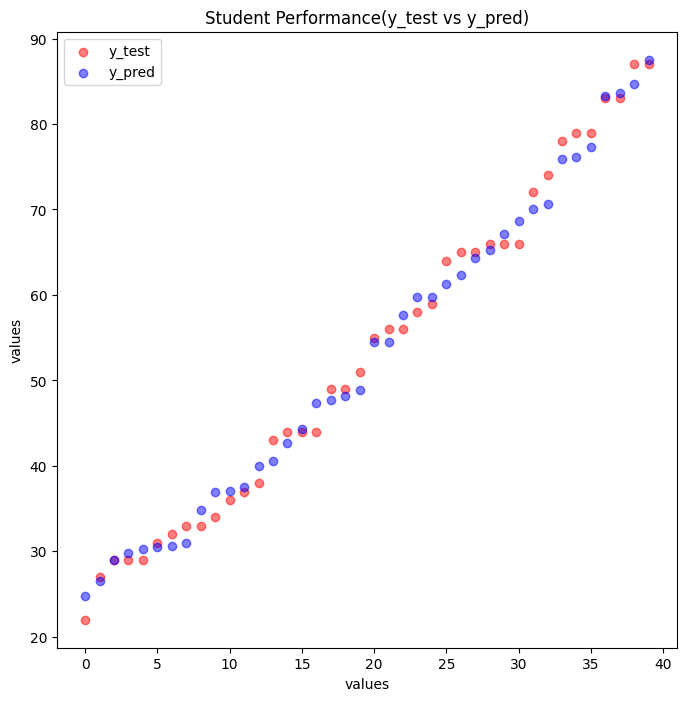

In [ ]:
new_y_test = y_test[:40]
new_y_Predt = y_Pred[:40]

plt.figure(figsize=(8, 8))
plt.scatter(x=range(len(new_y_test)), y=sorted(new_y_test), color='red',alpha = 0.5, label='y_test')
plt.scatter(x=range(len(new_y_Predt)), y=sorted(new_y_Predt), color='blue', alpha = 0.5,label='y_pred')
plt.xlabel('values')
plt.ylabel('values')
plt.legend()
plt.title('Student Performance(y_test vs y_pred)')
plt.show()

### **Evaluation Report**

- According to the graph above the predicted values of the model and the actual values of Student performance have close similarities. With an Accuracy of 98.887%, and Mean Absolute Error: 1 605 and Mean Squared Error: 4.039, we can conclude that the model accurately predicted and fitted how students will perform depending on their daily activities.

## **Polynomial Linear Regression**

### **Importing Libraries and data**

- We also import the necessary libraries here, including pandas, numpy, matplotlib, seaborn, and sklearn's PolynomialFeatures.
The dataset, 'WeatherData.csv', is loaded and used for this training and testing of Polynomial Linear Regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('/content/WeatherData.csv')
data.head()

,Temperature(C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


### **Cleaning and selecting data variables**

- We now select the independent variables (X) and the target variable (Y).

In [ ]:
X = data.iloc[:,0:-1]

In [ ]:
Y = data.iloc[:,-1]

### **Split data**

### **Scale and Build Model**

- We use Polynomial Regression with a degree of 2 to capture non-linear relationships. The model is built using Linear Regression and PolynomialFeatures.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_R = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

In [ ]:
lin_R.fit(X_poly, Y)

LinearRegression()

### Predict model

- We predict the target variable using the Polynomial Regression model.

In [ ]:
y_pred = lin_R.predict(X_poly)

### Evaluate model

- Just like at multiple LR, we evaluate the model thru calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [ ]:
pd.DataFrame({'Actual Test': Y,'Predicted':y_pred, 'Difference':(Y-y_pred) })

,Actual Test,Predicted,Difference
0,0.89,0.800689,0.089311
1,0.86,0.803930,0.056070
2,0.89,0.803314,0.086686
3,0.83,0.832482,-0.002482
4,0.83,0.820230,0.009770
5,0.85,0.807605,0.042395
6,0.95,0.846582,0.103418
7,0.89,0.819785,0.070215
8,0.82,0.761494,0.058506
9,0.72,0.665002,0.054998


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_poly = metrics.mean_absolute_error(Y, y_pred)
MSE_poly = metrics.mean_squared_error(Y,y_pred)
RMSE_poly  = np.sqrt(MSE_poly)

pd.DataFrame([MAE_poly, MSE_poly, RMSE_poly],
             index = ['MAE', 'MSE', 'RMSE_poly'],
             columns = ['Metrics'])

,Metrics
MAE,0.038686
MSE,0.002712
RMSE_poly,0.052074


In [ ]:
from sklearn.metrics import r2_score, accuracy_score
print("R-squared score/ Accuracy of model: {}%".format((r2_score(Y, y_pred)*100).round(3)))

R-squared score/ Accuracy of model: 89.783%


### Plot Model

- We now visualize the first 20 records using a bar plot to understand the model's predictions and actual values.

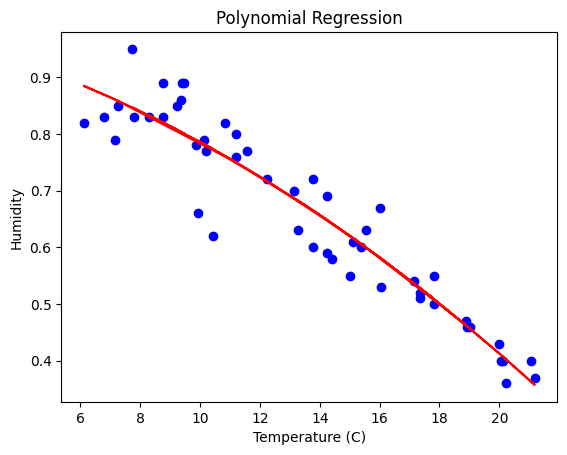

In [ ]:
plt.scatter(X, Y, c = "blue")
plt.title('Polynomial Regression')
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.plot(X, y_pred, c = 'red')

### **Evaluation Report**

High R-squared (89.783%): shows a high correlation between the variables and the model accurately predicts the relationship between them.

Non-zero error metrics: The Mean Absolute Error (MAE) of 0.038686 and Root Mean Squared Error (RMSE) of 0.052074. These errors indicate that the model is not perfect.

Although the model have detected some errors, it still produced high accuracy and demonstrates a good fit with the variables. This model almost accurately demonstrates the relationship of the independent dependent variables to our overall Dependent Variable(Humidity) for the student performance.

## **Logistic Regression**

### **Importing Libraries and Data**

- We start by importing necessary libraries such as numpy, pandas, matplotlib, seaborn, and scikit-learn modules for preprocessing and metrics.The dataset from 'framingham.csv' is loaded into a pandas DataFrame 'df', and the first few rows are displayed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
df = pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### **Cleaning and selecting Data**

- We address missing values in selected columns using mean imputation. The dataset information is displayed, and we calculate the correlation of each variable with the target variable 'TenYearCHD'. We then select independent variables (X) and the target variable (Y).

In [ ]:
df["education"].fillna(df["education"].mean(), inplace = True)
df["cigsPerDay"].fillna(df["cigsPerDay"].mean(), inplace = True)
df["totChol"].fillna(df["totChol"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)
df["glucose"].fillna(df["glucose"].mean(), inplace = True)
df["BPMeds"].fillna(df["BPMeds"].mean(), inplace = True)
df["heartRate"].fillna(df["heartRate"].mean(), inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.corr()['TenYearCHD']

male               0.088428
age                0.225256
education         -0.053384
currentSmoker      0.019456
cigsPerDay         0.057775
BPMeds             0.086774
prevalentStroke    0.061810
prevalentHyp       0.177603
diabetes           0.097317
totChol            0.081624
sysBP              0.216429
diaBP              0.145299
BMI                0.074680
heartRate          0.022898
glucose            0.120406
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [ ]:
X = df.iloc[:,:-1]
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [ ]:
Y = df.iloc[:,-1]

### **Split Data**

We split the data into training and testing sets using the train_test_split function.

In [ ]:
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 32)

### **Scale Build model**

- Now scaling the data using StandardScaler and build a Logistic Regression model.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression()

### **Model Evaluation**

-  We predict the target variable for both training and testing sets and evaluate the model using various metrics. Confusion matrix, classification reports, and a heatmap were used for better interpretation.

In [ ]:
y_pred_test = log_reg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Evaluate test model
print("Test Accuracy: {}%".format((metrics.accuracy_score(Y_test, y_pred_test)*100).round(3)))

Test Accuracy: 86.006%


In [ ]:
y_pred_train = log_reg.predict(X_train_scaled)

In [ ]:
print("Train Accuracy: {}%".format((accuracy_score(Y_train, y_pred_train)*100).round(3)))

Train Accuracy: 85.3%


In [ ]:
cf_m = pd.DataFrame(metrics.confusion_matrix(Y_test, y_pred_test), columns = ["Predict No", "Predict Yes"], index = ["Actual No", "Actual Yes"])
cf_m

,Predict No,Predict Yes
Actual No,1073,9
Actual Yes,169,21


In [ ]:
pd.DataFrame({'Actual Test': Y_test,'Predicted':y_pred_test, 'Difference':(Y_test-y_pred_test) })

,Actual Test,Predicted,Difference
4068,1,0,1
390,0,0,0
3309,0,0,0
1476,1,0,1
894,1,0,1
...,...,...,...
763,1,1,0
3019,0,0,0
2244,0,0,0
2860,0,0,0


In [ ]:
cf_m = pd.DataFrame(metrics.confusion_matrix(Y_test, y_pred_test,labels= log_reg.classes_))
cf_m

,0,1
0,1073,9
1,169,21


In [ ]:
from sklearn.metrics import classification_report

target = ['No', 'Yes']
print(classification_report(Y_test, y_pred_test, target_names = target))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92      1082
         Yes       0.70      0.11      0.19       190

    accuracy                           0.86      1272
   macro avg       0.78      0.55      0.56      1272
weighted avg       0.84      0.86      0.81      1272



In [ ]:
print(classification_report(Y_train, y_pred_train, target_names = target))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92      2512
         Yes       0.74      0.06      0.11       454

    accuracy                           0.85      2966
   macro avg       0.80      0.53      0.52      2966
weighted avg       0.84      0.85      0.80      2966



Text(0.5, 427.9555555555555, 'Predicted label')

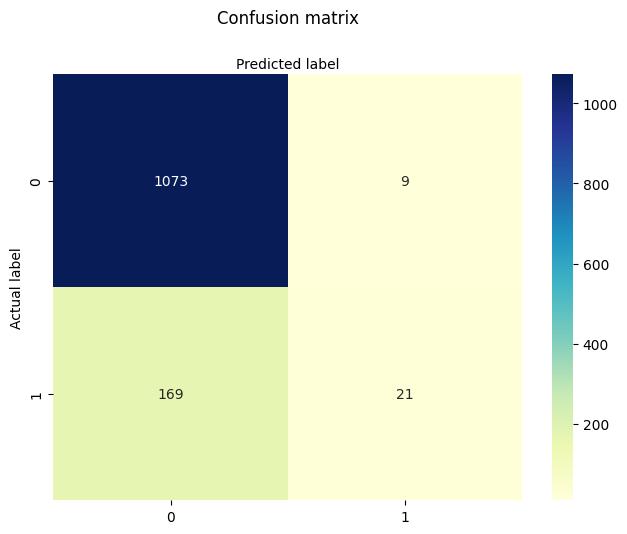

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(c_names))
plt.xticks(tick_marks, c_names)
plt.yticks(tick_marks, c_names)
# create heatmap
sns.heatmap(cf_m, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no', 'yes']
print(classification_report(Y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

          no       0.86      0.99      0.92      1082
         yes       0.70      0.11      0.19       190

    accuracy                           0.86      1272
   macro avg       0.78      0.55      0.56      1272
weighted avg       0.84      0.86      0.81      1272



### **Evaluation Report**

The logistic regression model exhibits varied performance in predicting student performance classes, showcasing strengths and weaknesses. In the training set, the model achieved a commendable overall accuracy of 86%, correctly identifying 99% of instances classified as "No." However, its performance on the "Yes" class was suboptimal, with a recall of only 11%. This limitation is more pronounced in the testing set, where all instances are predicted as "No," resulting in zero true positive predictions for the "Yes" class and an overall accuracy of 85%. The model's precision for "No" is robust at 86%, indicating reliability in identifying instances as "No," but precision for "Yes" drops to 70%. The macro average F1-score, which considers both classes equally, is 56%, suggesting room for improvement. Despite its overall accuracy, the model's challenges in capturing instances of the "Yes" class emphasize the need for further refinement and exploration of feature importance for enhanced predictive capabilities.

## **Decision Tree**

### **Importing Libraries and Data**

- We use same dataset of LogisticRegression 'framingham.csv' dataset and is loaded into a DataFrame 'dt_data', and the first few rows are displayed.
Same libraries used but now including sklearn's tree module for Decision Trees.


In [ ]:
import six
import sys
sys.modules['sklearn.external.six'] = six
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_data = pd.read_csv('/content/framingham.csv')
dt_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### **Cleaning and selecting Data**

- We perform Pearson correlation, handle missing values, and fill missing values in selected columns using mean imputation. The cleaned dataset is then split into independent variables (X) and the target variable (Y).


In [ ]:
dt_data.corr(method = 'pearson').round(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000,-0.029,0.017,0.198,0.318,-0.053,-0.005,0.005,0.016,-0.070,-0.036,0.058,0.082,-0.117,0.006,0.088
age,-0.029,1.000,-0.166,-0.214,-0.193,0.123,0.058,0.307,0.101,0.262,0.394,0.206,0.136,-0.013,0.122,0.225
education,0.017,-0.166,1.000,0.019,0.008,-0.011,-0.035,-0.082,-0.039,-0.023,-0.130,-0.062,-0.138,-0.054,-0.036,-0.054
currentSmoker,0.198,-0.214,0.019,1.000,0.770,-0.049,-0.033,-0.103,-0.044,-0.047,-0.130,-0.108,-0.168,0.062,-0.057,0.019
cigsPerDay,0.318,-0.193,0.008,0.770,1.000,-0.046,-0.033,-0.066,-0.037,-0.026,-0.089,-0.057,-0.093,0.075,-0.059,0.058
BPMeds,-0.053,0.123,-0.011,-0.049,-0.046,1.000,0.117,0.261,0.052,0.081,0.254,0.194,0.101,0.015,0.051,0.087
prevalentStroke,-0.005,0.058,-0.035,-0.033,-0.033,0.117,1.000,0.075,0.007,0.000,0.057,0.045,0.026,-0.018,0.018,0.062
prevalentHyp,0.005,0.307,-0.082,-0.103,-0.066,0.261,0.075,1.000,0.078,0.164,0.697,0.616,0.301,0.147,0.087,0.178
diabetes,0.016,0.101,-0.039,-0.044,-0.037,0.052,0.007,0.078,1.000,0.040,0.111,0.050,0.087,0.049,0.618,0.097
totChol,-0.070,0.262,-0.023,-0.047,-0.026,0.081,0.000,0.164,0.040,1.000,0.209,0.165,0.116,0.091,0.046,0.082


In [ ]:
dt_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dt_data = dt_data.dropna()
dt_data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dt_data["education"].fillna(dt_data["education"].mean(), inplace = True)
dt_data["cigsPerDay"].fillna(dt_data["cigsPerDay"].mean(), inplace = True)
dt_data["totChol"].fillna(dt_data["totChol"].mean(), inplace = True)
dt_data["BMI"].fillna(dt_data["BMI"].mean(), inplace = True)
dt_data["glucose"].fillna(dt_data["glucose"].mean(), inplace = True)
dt_data["BPMeds"].fillna(dt_data["BPMeds"].mean(), inplace = True)
dt_data["heartRate"].fillna(dt_data["heartRate"].mean(), inplace = True)

<ipython-input-1006-98f6bb6d5454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_data["education"].fillna(dt_data["education"].mean(), inplace = True)
<ipython-input-1006-98f6bb6d5454>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_data["cigsPerDay"].fillna(dt_data["cigsPerDay"].mean(), inplace = True)
<ipython-input-1006-98f6bb6d5454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_data["totChol"].fillna(dt_data["totChol

In [ ]:
dt_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
X = dt_data.iloc[:, 0:-1]
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [ ]:
Y = dt_data.iloc[:, -1]

### **Split Data and build Model**

- We split the dataset into training and testing sets and build a Decision Tree model using the DecisionTreeClassifier.

In [ ]:
# Split Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)

# Fit
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 0, max_depth = 5, ccp_alpha = 0.0)

dtc.fit(X_train, Y_train)
clf = dtc.fit(X_train, Y_train)

In [ ]:
Y_pred = dtc.predict(X_test)

### **Model Performance**

- We assess the model's accuracy, classification report, and various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Feature importances are visualized through a bar plot.

In [ ]:
print("Accuracy: {}%".format((metrics.accuracy_score(Y_test, Y_pred)*100).round(3)))

Accuracy: 82.862%


In [ ]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       928
           1       0.31      0.09      0.15       169

    accuracy                           0.83      1097
   macro avg       0.58      0.53      0.53      1097
weighted avg       0.77      0.83      0.79      1097



In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_poly = metrics.mean_absolute_error(Y_test, Y_pred)
MSE_poly = metrics.mean_squared_error(Y_test, Y_pred)
RMSE_poly  = np.sqrt(MSE_poly)

pd.DataFrame([MAE_poly, MSE_poly, RMSE_poly],
             index = ['MAE', 'MSE', 'RMSE_poly'],
             columns = ['Metrics'])

,Metrics
MAE,0.171376
MSE,0.171376
RMSE_poly,0.413976


In [ ]:
dtc.feature_importances_

array([0.08160049, 0.25868019, 0.        , 0.        , 0.05135142,
       0.        , 0.        , 0.        , 0.        , 0.12264984,
       0.20779092, 0.02585617, 0.08465417, 0.        , 0.16741679])

In [ ]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)

<Axes: >

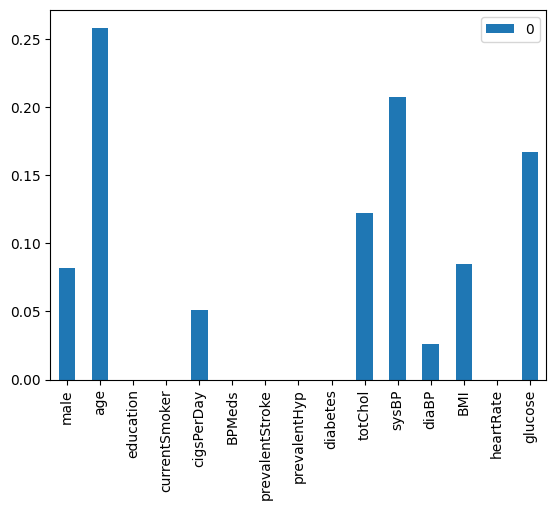

In [ ]:
features.plot(kind = 'bar')

### Confusion Matrix

- Now using seaborn module (being imported already at LogissticRegression section) to display heatmaps

In [ ]:
cf_m = pd.DataFrame(confusion_matrix(Y_test, Y_pred))
cf_m

,0,1
0,893,35
1,153,16


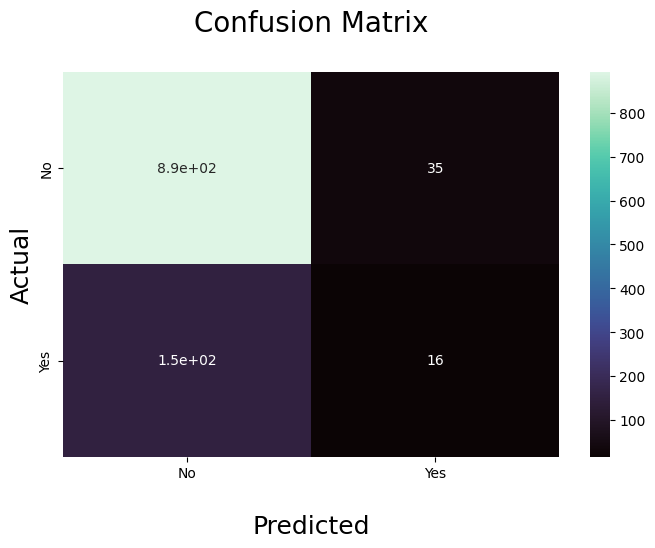

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.heatmap(cf_m, annot = True, cmap = "mako")

ax.set_title("Confusion Matrix\n", fontsize = 20)
ax.set_xlabel("\nPredicted", fontsize = 18)
ax.set_ylabel("Actual", fontsize = 18)

ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])


plt.show()

### Tree plotting

- We visualize the Decision Tree using the export_graphviz function and create a PNG image.

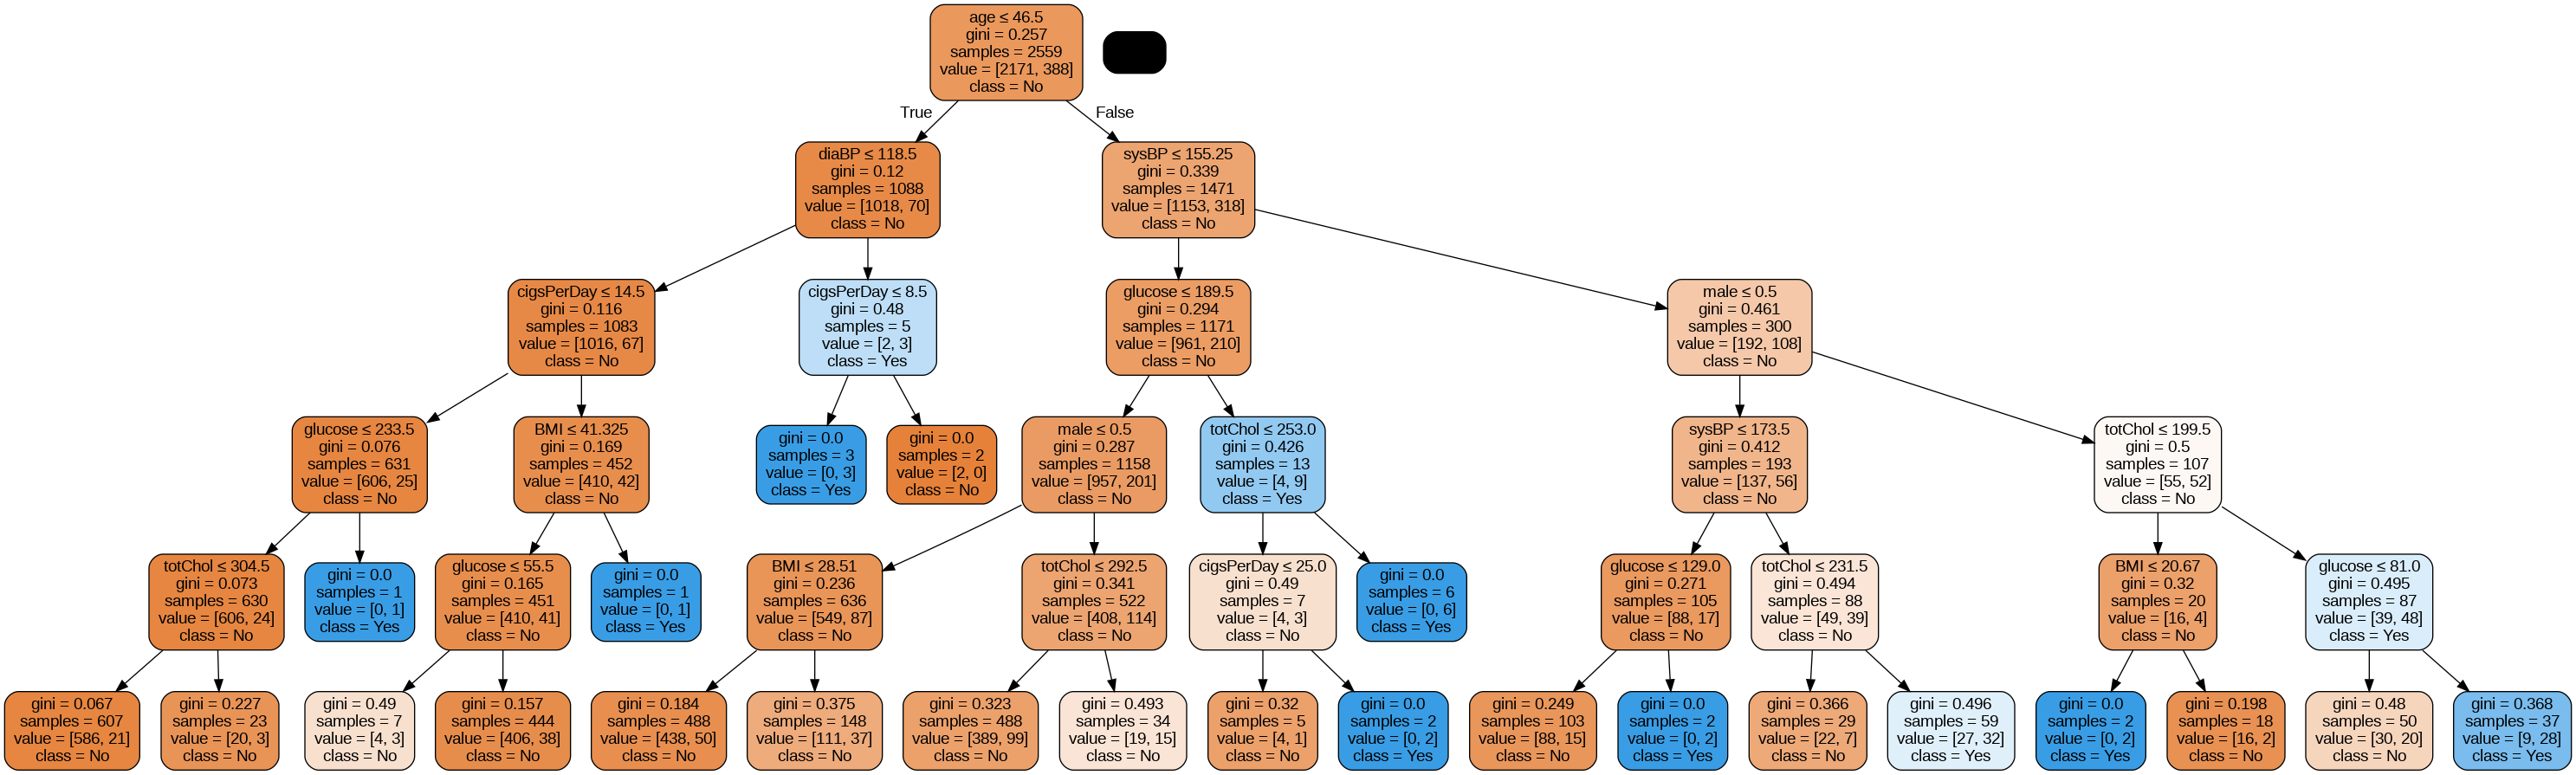

In [ ]:
#import the tree module from the sklearn library
import six
import sys
sys.modules['sklearn.external.six'] = six
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file = dot_data, filled = True,
                rounded = True, special_characters = True,
                feature_names = X.columns, class_names = ['No', 'Yes'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Heart.png')
Image(graph.create_png())

### **Optimizing Decision Tree hyperparameter optimization**

- We optimize the Decision Tree model using GridSearchCV to find the best hyperparameters for improved performance.

In [ ]:
# Optimize Model
from sklearn.model_selection import GridSearchCV

num = [i for i in range(1,10)]
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth' : num,
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': num,
              'max_leaf_nodes': num,
              'splitter': ['best', 'random']
              }

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), parameters,
                       cv=5, n_jobs=-1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 40, test_size = 0.3)

In [ ]:
dt_grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9180 fits failed out of a total of 43740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4860 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [ ]:
best = dt_grid.best_params_
print(best)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 9, 'min_samples_split': 6, 'splitter': 'best'}


In [ ]:
#new_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                 #max_features='auto', max_leaf_nodes=6,
                                 #min_samples_split=2, splitter = 'best', random_state = 42)
new_dtc = dt_grid.best_estimator_

In [ ]:
new_pred = new_dtc.predict(X_test)

In [ ]:
print("Decision Tree Accuracy: {}%".format((metrics.accuracy_score(Y_test, new_pred)*100).round(3)))

Decision Tree Accuracy: 84.503%


In [ ]:
print("Train Accuracy: {}%".format((new_dtc.score(X_train,Y_train)*100).round(3)))

Train Accuracy: 84.799%


In [ ]:
print("Test Accuracy rate: {}%".format((new_dtc.score(X_test, Y_test)*100).round(3)))

Test Accuracy rate: 84.503%


In [ ]:
from sklearn.metrics import classification_report
print(metrics.classification_report(Y_test, new_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       941
           1       0.28      0.06      0.10       156

    accuracy                           0.85      1097
   macro avg       0.57      0.52      0.51      1097
weighted avg       0.78      0.85      0.80      1097



In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_poly = metrics.mean_absolute_error(Y_test, new_pred)
MSE_poly = metrics.mean_squared_error(Y_test, new_pred)
RMSE_poly  = np.sqrt(MSE_poly)

pd.DataFrame([MAE_poly, MSE_poly, RMSE_poly],
             index = ['MAE', 'MSE', 'RMSE_poly'],
             columns = ['Metrics'])

,Metrics
MAE,0.154968
MSE,0.154968
RMSE_poly,0.393660


### Plotting the  Optimized Tree

- Now we visualize the optimized Decision Tree using the export_graphviz function and create a PNG image.

In [ ]:
cols = X.columns
cols

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

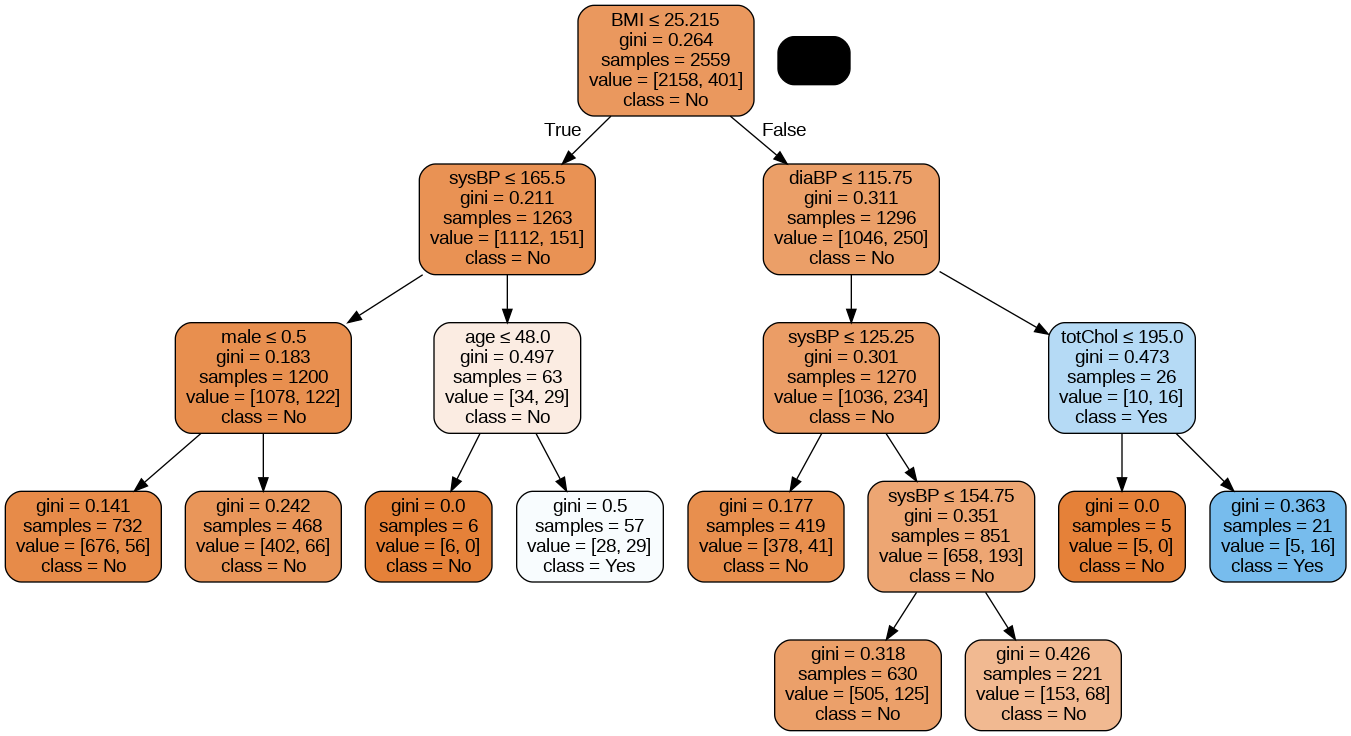

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(new_dtc, out_file = dot_data, filled = True,
                rounded = True, special_characters = True,
                feature_names = cols, class_names = ['No', 'Yes'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('new_heart.png')
Image(graph.create_png())

### **Evaluation Report for Decision Tree**

- Our decision tree model achieved an accuracy rate of 82.8% on our initial tree parameters before optimization. Our accuracy MAE and MSE values were close to zero, suggesting that our model had minimal errors. After parameter tuning, our New Performance evaluation was not significantly different from our initial Performance evaluation. Our classifier has good precision (0.85) and recall (0.99) for class 0, but low precision (0.20) and recall (0.01) for class 1. This means that the classifier is highly good at properly recognizing negative cases (class 0), but not very good at detecting positive cases (class 1). The F1-score, which is the harmonic mean of accuracy and recall, is likewise quite low (0.91 for class 0 and 0.02 for class 1), showing that the classifier's performance is not well balanced between the two classes.


## **Random Forest**

###**Importing Libraries and Dataset**

- We used same libraries here like from Logistics and Tree. And we used 'apple_quality.csv' as dataset into the DataFrame 'a_data'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

a_data = pd.read_csv('/content/apple_quality.csv')
a_data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


### **Cleaning data**

-  We preprocess the 'Quality' column by encoding 'bad' as 0 and 'good' as 1.
After checking correlations and dropping certain columns with missing values, the dataset is cleaned.


In [ ]:
a_data["Quality"] = a_data["Quality"].apply(lambda toLabel: 0 if toLabel == 'bad' else 1)
a_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [ ]:
a_data.corr()['Quality']

<ipython-input-1038-9f11350e3c8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a_data.corr()['Quality']


A_id           0.004875
Size           0.244007
Weight         0.001421
Sweetness      0.250998
Crunchiness   -0.012376
Juiciness      0.260223
Ripeness      -0.264315
Quality        1.000000
Name: Quality, dtype: float64

In [ ]:
a_data.drop(columns = ['Weight', 'A_id','Crunchiness'])
a_data = a_data.dropna()

###**Selecting x and y values**

- We then separate the independent variables (x) and the target variable (y) for the Random Forest model.

In [ ]:
x = a_data.iloc[:, :-1].values
x

array([[0.0, -3.970048523, -2.512336381, ..., 1.844900361, 0.329839797,
        '-0.491590483'],
       [1.0, -1.195217191, -2.839256528, ..., 0.853285795, 0.867530082,
        '-0.722809367'],
       [2.0, -0.292023862, -1.351281995, ..., 2.838635512, -0.038033328,
        '2.621636473'],
       ...,
       [3997.0, -2.634515299, -2.13824672, ..., 2.19970859, 4.763859177,
        '-1.334611391'],
       [3998.0, -4.008003744, -1.779337107, ..., 2.161435121,
        0.214488384, '-2.229719806'],
       [3999.0, 0.27853965, -1.715505028, ..., 1.2666774, -0.77657147,
        '1.599796456']], dtype=object)

In [ ]:
y = a_data.iloc[:, -1].values
y

array([1, 1, 0, ..., 0, 1, 1])

###**Splitting data**

- The dataset is split into training and testing sets using the train_test_split method. A Random Forest Classifier is then trained using specified parameters.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = 0.3)

In [ ]:
rfc = RandomForestClassifier(criterion='gini',random_state = 50,
                             max_depth = 5, n_estimators = 260)
clr = rfc.fit(x_train, y_train)

In [ ]:
pred = clr.predict(x_test)

### **Model Evalutaion**

- We evaluate the Random Forest model's performance using various metrics such as accuracy score, mean absolute error, and a classification report. The confusion matrix is visualized using seaborn's heatmap.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, classification_report

print("Test Accuracy score: {}%".format((accuracy_score(y_test, pred)*100).round(3)))

Test Accuracy score: 83.583%


In [ ]:
pred_train = clr.predict(x_train)

In [ ]:
print("Train Accuracy score: {}%".format((accuracy_score(y_train, pred_train)*100).round(3)))

Train Accuracy score: 86.821%


In [ ]:
mean_absolute_error(y_test, pred)

0.16416666666666666

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       586
           1       0.84      0.85      0.84       614

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200



In [ ]:
conf_m = pd.DataFrame(confusion_matrix(y_test, pred))
conf_m

,0,1
0,484,102
1,95,519


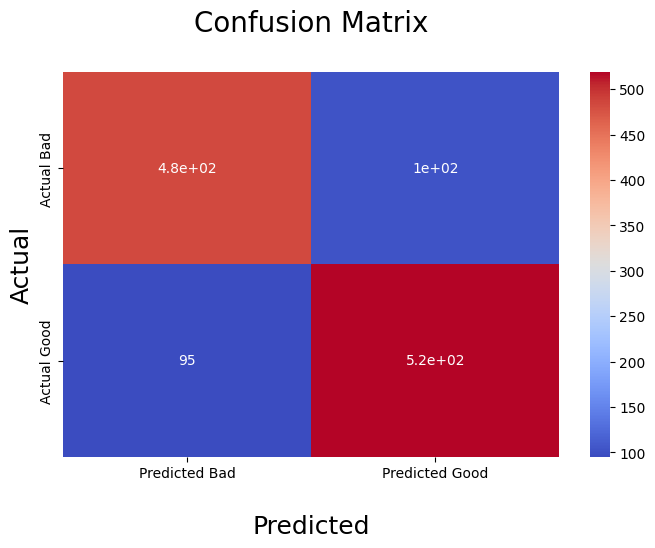

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.heatmap(conf_m, annot = True, cmap = "coolwarm")

ax.set_title("Confusion Matrix\n", fontsize = 20)
ax.set_xlabel("\nPredicted", fontsize = 18)
ax.set_ylabel("Actual", fontsize = 18)

ax.xaxis.set_ticklabels(['Predicted Bad', 'Predicted Good'])
ax.yaxis.set_ticklabels(['Actual Bad', 'Actual Good'])

plt.show()

### **Evaluation Report for Random Forest**

The Random Forest model exhibits commendable performance in classifying apple quality, achieving an overall accuracy of 84% on the testing set. The confusion matrix reveals a nuanced breakdown of predictions, showcasing the model's ability to correctly identify instances as "Bad" or "Good." In classifying "Bad" apples, the model demonstrates a precision of 0.84 and recall of 0.83, while for "Good" apples, it achieves a precision of 0.84 and recall of 0.85. The macro average F1-score of 0.84 indicates a balanced performance across both classes. The detailed evaluation report underscores the model's reliability, providing valuable insights into its precision, recall, and F1-score metrics. Overall, the Random Forest model emerges as an effective tool for apple quality assessment, offering robust and well-generalized classification capabilities based on the provided features.